<a href="https://colab.research.google.com/github/Nasty-24/Student_Enrollment_Prediction_Model/blob/main/Student_Enrollment_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [ ]:
data = {
    "GPA": np.random.uniform(1.5, 4.0, 500),
    "AttendanceRate": np.random.uniform(50, 100, 500),
    "FamilyIncome": np.random.randint(10000, 200000, 500),
    "Age": np.random.randint(17, 30, 500),
    "TestScore": np.random.randint(200, 800, 500),
    "Enrolled": np.random.randint(0, 2, 500)   # 1 = Enrolled, 0 = Not Enrolled
}

df = pd.DataFrame(data)

In [ ]:
X = df.drop("Enrolled", axis=1)
y = df["Enrolled"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.54

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.47      0.50        73
           1       0.55      0.61      0.58        77

    accuracy                           0.54       150
   macro avg       0.54      0.54      0.54       150
weighted avg       0.54      0.54      0.54       150


Confusion Matrix:
 [[34 39]
 [30 47]]


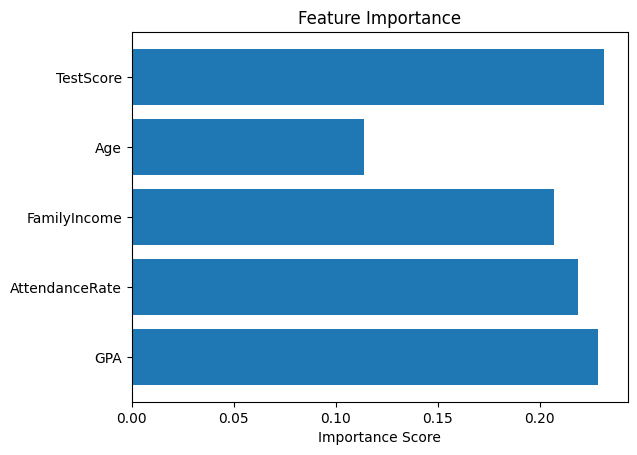

In [ ]:
importances = model.feature_importances_
feature_names = X.columns

plt.barh(feature_names, importances)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.show()